# **Como prever o Tráfego (e a receita) de sistemas indoor ?**

* Utilizando dados da ABRASCE (Associação Brasileira de Shoppings Centeres), dados de Volume de trafego cursado na rede da TIM durante o mês de Novembro/23 nos shoppings que já temos sistema indoor instalado e o retorno R$ / MB de tráfego, estimamos qual seria o retorno em novos projetos.
-----
 

In [87]:
# Import modules we'll need for this notebook
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor  
import matplotlib.pyplot as plt
%matplotlib inline

# **Features Utilizadas**
---------


In [88]:
data = pd.read_excel('entrada_existentes.xlsx')
data.columns

Index(['ID', 'A', 'B', 'C', 'D', 'ABL', 'Fluxo', 'LojasTotal', 'LojasAncora',
       'LojasMega', 'ALIMENTAÇÃO', 'CINEMA', 'Pisos', 'Capital', 'Renda',
       'MktShare', 'Volume'],
      dtype='object')

In [89]:
data.sample(5)

,ID,A,B,C,D,ABL,Fluxo,LojasTotal,LojasAncora,LojasMega,ALIMENTAÇÃO,CINEMA,Pisos,Capital,Renda,MktShare,Volume
36,62,1,12,41,46,14964.0,702737,70,7,4,6,0,1,0,725,20.16,7.427919
26,43,6,40,38,16,41039.0,762799,254,8,4,59,6,2,1,532,31.19,3.490818
28,50,10,35,40,15,30606.0,762799,158,7,3,23,6,2,0,401,71.96,7.321900
38,65,30,50,20,0,93000.0,1458913,410,23,20,42,10,4,1,2043,31.46,23.471431
8,10,24,50,24,2,60519.4,1458913,341,11,4,50,7,2,1,2180,29.87,10.319613


In [90]:
numeric_features = ['A', 'B', 'C', 'D', 'ABL', 'Fluxo', 'LojasTotal', 'LojasAncora',
                    'LojasMega', 'ALIMENTAÇÃO', 'CINEMA', 'Pisos', 'Capital', 'Renda',
                'MktShare', 'Volume']
data.describe()

# After separating the dataset, we now have numpy arrays named **X** containing the features, and **y** containing the labels.
X, y = data[numeric_features].values, data['Volume'].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

print ('Training Set: %d linhas\nTest Set: %d linhas' % (X_train.shape[0], X_test.shape[0]))

Training Set: 36 linhas
Test Set: 9 linhas


## **Treinar modelo**
------

## Experiment with Algorithms

The linear-regression algorithm we used last time to train the model has some predictive capability, but there are many kinds of regression algorithm we could try, including:

- **Linear algorithms**: Not just the Linear Regression algorithm we used above (which is technically an *Ordinary Least Squares* algorithm), but other variants such as *Lasso* and *Ridge*.
- **Tree-based algorithms**: Algorithms that build a decision tree to reach a prediction.
- **Ensemble algorithms**: Algorithms that combine the outputs of multiple base algorithms to improve generalizability.


In [93]:
# Escalar  
numeric_features = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])


# passos
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

# Criar pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                          # ('regressor', GradientBoostingRegressor())])
                           ('regressor', RandomForestRegressor())])

# fit 
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15])])),
                ('regressor', RandomForestRegressor())])


MSE: 0.7507709224467012
RMSE: 0.8664703817481018
R2: 0.9814908392384509


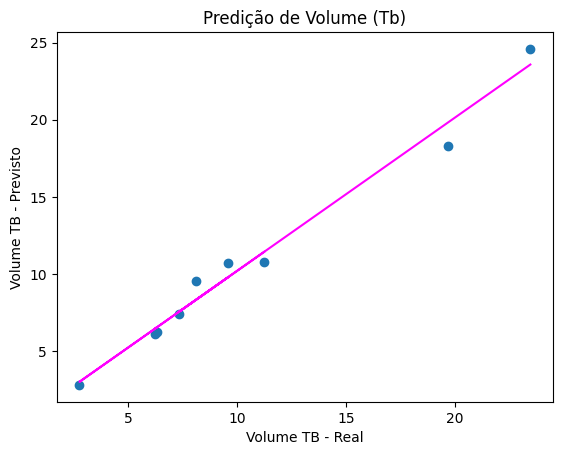

In [94]:
# predicoes
predictions = model.predict(X_test)

# metricas
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Volume TB - Real')
plt.ylabel('Volume TB - Previsto')
plt.title('Predição de Volume (Tb)')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [95]:
predictions

array([10.77425063,  9.58132558,  2.8291252 ,  6.26507851,  6.10361862,
       10.72909595,  7.4027296 , 18.32289386, 24.58492692])

* **Erro Quadrático Médio (MSE - Mean Squared Error):** É a média dos quadrados dos erros. Quanto menor o valor, melhor o modelo. O valor mínimo é 0, indicando que o modelo prevê perfeitamente os valores reais. Não há um valor máximo definido.
MSE=n1​i=1∑n​(yi​−y^​i​)2


* **Raiz do Erro Quadrático Médio (RMSE - Root Mean Squared Error):** É a raiz quadrada do MSE. Assim como o MSE, quanto menor o valor, melhor o modelo. O valor mínimo é 0, indicando que o modelo prevê perfeitamente os valores reais. Não há um valor máximo definido.
RMSE=MSE​=n1​i=1∑n​(yi​−y^​i​)2​


* **Coeficiente de Determinação (R²):** É uma medida estatística que indica a proporção da variância na variável dependente que é previsível a partir da(s) variável(is) independente(s). O valor máximo é 1, indicando que o modelo explica toda a variabilidade dos dados de resposta em torno de sua média. O valor mínimo pode ser negativo se o modelo for completamente inapropriado.
R2=1−MSEbaseline​MSEmodelo​​

In [96]:
import joblib

# Save the model as a pickle file
filename = './model.pkl'
joblib.dump(model, filename)

['./model.pkl']

### Treinando o modelo com todos os dados
------

In [97]:
# fit 
model = pipeline.fit(X, (y))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15])])),
                ('regressor', RandomForestRegressor())])


## **Estimando novos Shoppings**
-----

In [106]:
Novos = pd.read_excel('entrada_novos_exemplo.xlsx')
#Novos = pd.read_excel('entrada_novos.xlsx')

Xnovos = Novos.values
Novos.head()

,ID,A,B,C,D,ABL,Fluxo,LojasTotal,LojasAncora,LojasMega,ALIMENTAÇÃO,CINEMA,Pisos,Capital,Renda,MktShare
0,Iguatemi Fortaleza,20,50,15,15,93000.00,1458913,429,15,16,60,12,4,1,1664,31.46
1,River Petrolina,5,50,40,5,27293.32,702737,70,6,1,18,4,1,0,1100,23.61
2,RioMar Recife,35,39,26,0,103000.00,1458913,380,17,15,60,9,3,1,867,25.50


In [108]:
#XnovosStd = scaler.fit_transform(Xnovos)
VolumePrevisto = model.predict(Xnovos)

# apply a model to all rows of XnovosStd and put the value at a new column

In [109]:
VolumePrevisto

array([25.45992641, 22.9206943 , 23.51731317])

In [110]:
Novos['VolumePrevisto'] = VolumePrevisto


In [116]:
Novos

,ID,A,B,C,D,ABL,Fluxo,LojasTotal,LojasAncora,LojasMega,ALIMENTAÇÃO,CINEMA,Pisos,Capital,Renda,MktShare,VolumePrevisto
0,Iguatemi Fortaleza,20,50,15,15,93000.00,1458913,429,15,16,60,12,4,1,1664,31.46,25.459926
1,River Petrolina,5,50,40,5,27293.32,702737,70,6,1,18,4,1,0,1100,23.61,22.920694
2,RioMar Recife,35,39,26,0,103000.00,1458913,380,17,15,60,9,3,1,867,25.50,23.517313


### O Iguatemi Fortaleza teria um volume previsto de 28,7 Tb / mês


In [60]:
Novos.to_excel('Resultado_rev0.xlsx', index=False)

# **Próximos passos**
----

* Aumentar a quantidade de amostras.
* Refinar os dados dos Shoppings.
* Melhorar a estimativa de valor R$ / Mb pois a que temos é de 2019 e não sabemos como se chegou neste número. 
* O volume pode ser menor por restrições do ponte de vista de cobertura ou acesso. Uma forma de modelar essas questões seria incluir as features abaixo:
    - Quantidade de antenas, com isso podemos modelar os shopping pela relação ABL / quant de antenas 
    - Quantidade de Layers 4G



* 1 TB ~ R$ 2mil reais de Faturamento